In [ ]:
import numpy as np
import json
from PIL import Image
from math import ceil

In [ ]:
with open('test_annotation.json') as f: # annotations from POS1
  annotation = json.load(f)

In [ ]:
def convert_coordinate(p, resolution=350):
  return ceil(ceil(float(p)) / 1024 * resolution)

In [ ]:
# obj is annotation of an object, img -- Pillow RGB image

def get_rotation(obj, img):
  rr = convert_coordinate(obj['rr'])
  cc = convert_coordinate(obj['cc'])
  r = convert_coordinate(obj['radius'])
  if obj['shape'] == 'triangle':
    if cc+2 > 349:
      return 'vert'
    if rr > 349:
      return 'horiz'
    if img[cc+2, rr] == img[cc-2, rr]:
      return 'horiz'
    else:
      return 'vert'
  if obj['shape'] == 'rectangle':
    if cc+ceil(r/2)+2 > 349:
      return 'vert'
    elif (img[cc, rr] == img[cc+ceil(r/2)+2, rr]):
      return 'horiz'
    else:
      return 'vert'
  if obj['shape'] == 'circle' or obj['shape'] == 'square':
    return 'N/A'

In [ ]:
def get_box(obj):

  rr = convert_coordinate(obj['rr'])
  cc = convert_coordinate(obj['cc'])
  r = convert_coordinate(obj['radius'])
  box = []

  if (obj['shape'] == 'circle' or obj['shape'] == 'square'):
    tl = [cc-r-1, rr-r-1]
    br = [cc+r+1, rr+r+1]
    box.extend(tl)
    box.extend(br)
    return box

  if obj['shape'] == 'rectangle':
    if obj['rotation'] == 'vert':
      tl = [cc-ceil(r/2)-1, rr-2*r-1]
      br = [cc+ceil(r/2)+1, rr+2*r+1]
      box.extend(tl)
      box.extend(br)
      return box
    if obj['rotation'] == 'horiz':
      tl = [cc-2*r-1, rr-ceil(r/2)-1]
      br = [cc+2*r+1, rr+ceil(r/2)+1]
      box.extend(tl)
      box.extend(br)
      return box

  if obj['shape'] == 'triangle':
    if obj['rotation'] == 'vert':
      tl = [cc-2*r-1, rr-2*r-1]
      br = [cc+1, rr+2*r+1]
      box.extend(tl)
      box.extend(br)
      return box
    if obj['rotation'] == 'horiz':
      tl = [cc-2*r-1, rr-2*r-1]
      br = [cc+2*r+1, rr+1]
      box.extend(tl)
      box.extend(br)
      return box

Visualise bounding boxes

In [ ]:
!pip install mxnet==1.6.0
!pip install -U d2l -f https://d2l.ai/whl.html

In [ ]:
from d2l import mxnet as d2l
from mxnet import image, npx

In [ ]:
def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (top-left x, top-left y, bottom-right x,
    # bottom-right y) format to matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

[22, 176.5, 58, 185.5]
[220.0, 190, 248.0, 302]
[295.5, 213, 316.5, 297]
[250.5, 236, 265.5, 296]
[18, 232.0, 130, 260.0]
[58, 66.0, 130, 84.0]


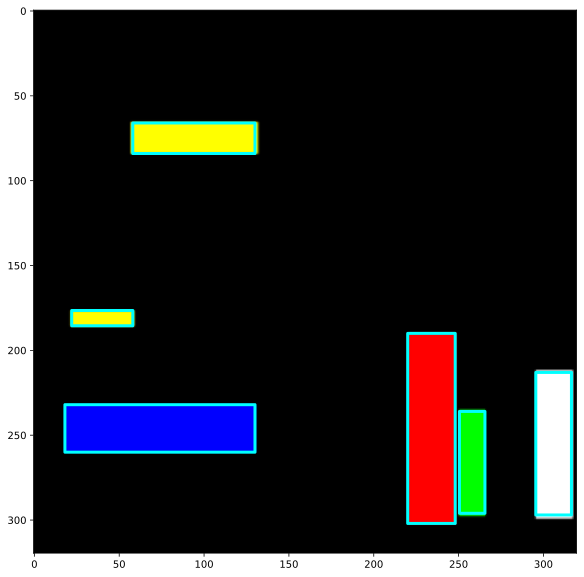

In [ ]:
d2l.set_figsize((10, 10))
img = image.imread('994.png').asnumpy()

boxes = []
for obj in objects:
  boxes.append(obj['box'])

fig = d2l.plt.imshow(img)
for bbox in boxes:
  print(bbox)
  fig.axes.add_patch(bbox_to_rect(bbox, 'cyan'))

d2l.plt.savefig('boxes_rectangles.jpg', bbox_inches='tight', pad_inches=0)

In [ ]:
img_filename = '179.png'
img = Image.open(img_filename).load()
objects = annotation[img_filename.split('.')[0]][1]['objects']
for obj in objects:
  obj['rotation'] = get_rotation(obj, img)
for obj in objects:
  obj['box'] = get_box(obj)

boxes = []
for obj in objects:
  boxes.append(obj['box'])

[21.875, 177.1875, 59.375, 186.5625]
[220.625, 190.3125, 248.75, 302.8125]
[295.625, 212.1875, 317.5, 299.6875]
[250.3125, 235.625, 265.9375, 298.125]
[18.4375, 232.5, 130.9375, 260.625]
[57.1875, 66.25, 132.1875, 85.0]


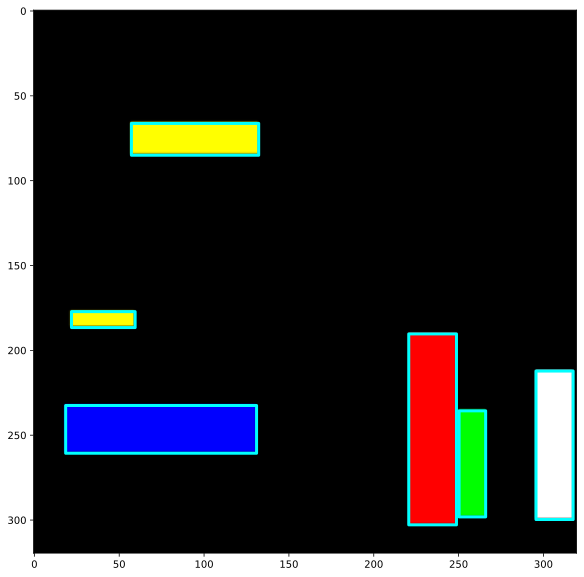

In [ ]:
d2l.set_figsize((10, 10))
img = image.imread(img_filename).asnumpy()
fig = d2l.plt.imshow(img)

for bbox in boxes:
  print(bbox)
  fig.axes.add_patch(bbox_to_rect(bbox, 'cyan'))

d2l.plt.savefig('boxes_circles.jpg', bbox_inches='tight', pad_inches=0)

In [ ]:
img_filename = '1005.png'
img = Image.open(img_filename).load()
objects = annotation[img_filename.split('.')[0]][1]['objects']
for obj in objects:
  obj['rotation'] = get_rotation(obj, img)
for obj in objects:
  obj['box'] = get_box(obj)

boxes = []
for obj in objects:
  boxes.append(obj['box'])

[44, 154, 62, 172]
[252, 70, 314, 132]
[181, 286, 211, 316]
[208, 213, 276, 281]
[128, 89, 202, 163]
[35, 70, 71, 106]
[114, 250, 132, 268]
[213, 136, 249, 172]


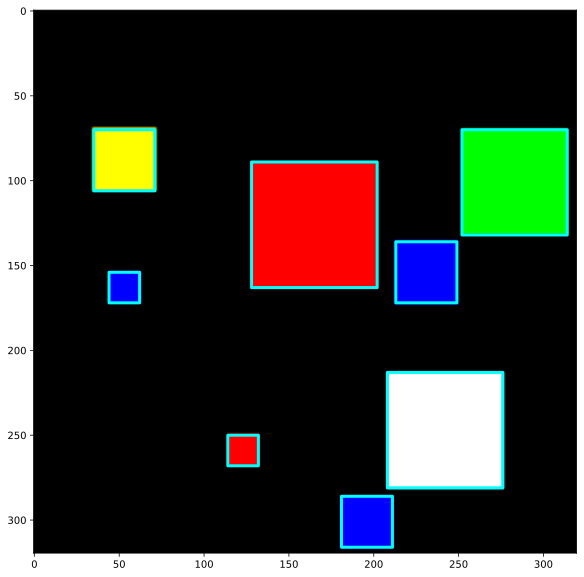

In [ ]:
d2l.set_figsize((10, 10))
img = image.imread(img_filename).asnumpy()
fig = d2l.plt.imshow(img)

for bbox in boxes:
  print(bbox)
  fig.axes.add_patch(bbox_to_rect(bbox, 'cyan'))

d2l.plt.savefig('boxes_squares.jpg', bbox_inches='tight', pad_inches=0)

In [ ]:
img_filename = '1040.png'
img = Image.open(img_filename).load()
objects = annotation[img_filename.split('.')[0]][1]['objects']
for obj in objects:
  obj['rotation'] = get_rotation(obj, img)
for obj in objects:
  obj['box'] = get_box(obj)

boxes = []
for obj in objects:
  boxes.append(obj['box'])

[145.3125, 35.0, 207.8125, 160.0]
[27.1875, 226.875, 102.1875, 264.375]
[215.625, 198.4375, 265.625, 298.4375]
[67.5, 12.8125, 155.0, 56.5625]
[101.5625, 110.625, 139.0625, 185.625]


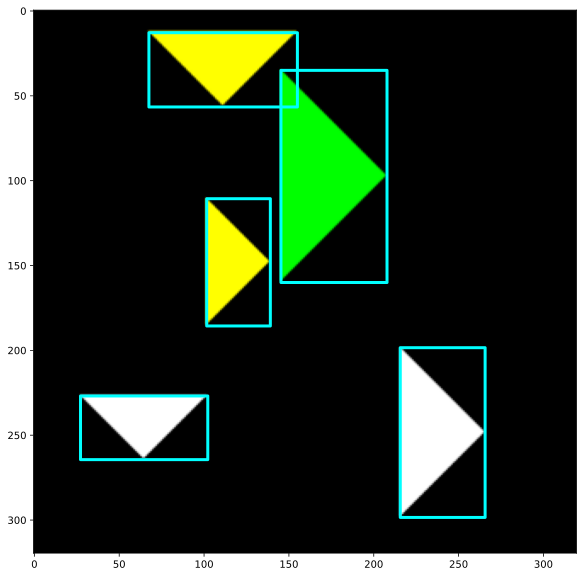

In [ ]:
d2l.set_figsize((10, 10))
img = image.imread(img_filename).asnumpy()
fig = d2l.plt.imshow(img)

fig = d2l.plt.imshow(img)

for bbox in boxes:
  print(bbox)
  fig.axes.add_patch(bbox_to_rect(bbox, 'cyan'))

d2l.plt.savefig('boxes_triangles.jpg', bbox_inches='tight', pad_inches=0)

Add all boxes to annotations

In [ ]:
!unzip test350.zip # POS1 images resized to 350x350

In [ ]:
bboxes = {}

for key, item in annotation.items():

  bboxes[key] = []

  img_filename = 'test350/%s.png' % key
  img = Image.open(img_filename).load()

  objects = item[1]['objects']

  for obj in objects:
    obj['rotation'] = get_rotation(obj, img)
    obj['bbox'] = get_box(obj)
    new_obj = {'color': obj['color'],
               'shape': obj['shape'],
               'size': obj['size'],
               'thresh_dist': obj['thresh_dist'],
               'rotation': obj['rotation'],
               'bbox': obj['bbox']
               }
    bboxes[key].append(new_obj)

In [ ]:
with open('test_annotation_bboxes_350.json', 'w+') as f:
  json.dump(bboxes, f)

In [ ]:
import json
with open('test_annotation_bboxes_350.json') as f:
  bboxes = json.load(f)

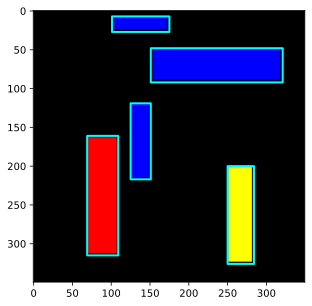

In [ ]:
import random

img_id, objects = random.choice(list(bboxes.items()))

d2l.set_figsize((5, 5))
img = image.imread('test350/%s.png' % img_id).asnumpy() # original test images from POS1
fig = d2l.plt.imshow(img)

for obj in objects:
  fig.axes.add_patch(bbox_to_rect(obj['bbox'], 'cyan'))

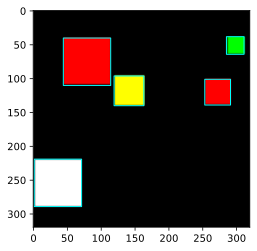

In [ ]:
d2l.set_figsize((4, 4))
img = image.imread('test/%s.png' % img_id).asnumpy()
fig = d2l.plt.imshow(img)

for obj in bboxes[img_id]:
   fig.axes.add_patch(bbox_to_rect(obj['bbox'], 'cyan'))